# 4.9.2 Intro to Data Visualization with Python

## 01. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import Data

In [3]:
path = r'C:\Users\ThinkPad X250\Documents\Instacart Basket Analysis'

In [4]:
df_ords_prods_cx = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [5]:
df_ords_prods_cx.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
print(df_ords_prods_cx.loc[:, 'loyalty_flag'])

0               New customer
1               New customer
2               New customer
3               New customer
4               New customer
                  ...       
32404854    Regular customer
32404855        New customer
32404856        New customer
32404857        New customer
32404858        New customer
Name: loyalty_flag, Length: 32404859, dtype: object


In [7]:
df_ords_prods_cx.shape

(32404859, 30)

## 03. Task

### *Create a sample*

In [8]:
# creating new list (boolean) to test np.random.rand() <= 0.8 
dev = np.random.rand(len(df_ords_prods_cx)) <= 0.8

In [9]:
# checking the new dev
dev

array([ True,  True,  True, ...,  True,  True,  True])

In [10]:
# create big sample
big = df_ords_prods_cx[dev]

In [11]:
# create small sample
small = df_ords_prods_cx[~dev]

## __I. Bar Chart : “loyalty_flag”__

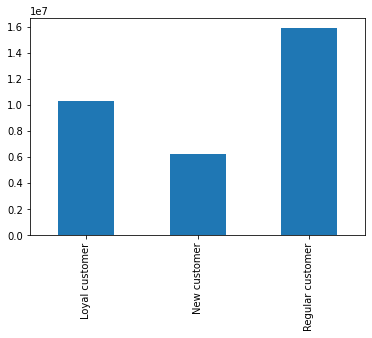

In [12]:
# creating  bar charts
loyal_bar = df_ords_prods_cx['loyalty_flag'].value_counts().sort_index().plot.bar()

In [13]:
# print frequency
df_ords_prods_cx['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

In [14]:
# ordered largest to smallest index
df_ords_prods_cx['loyalty_flag'].value_counts().sort_index()

Loyal customer      10284093
New customer         6243990
Regular customer    15876776
Name: loyalty_flag, dtype: int64

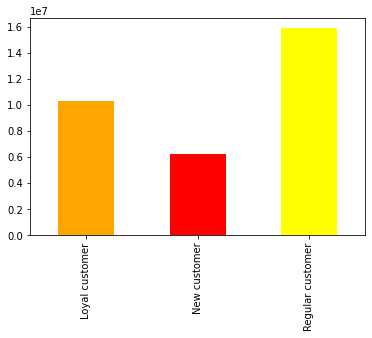

In [15]:
# adding colors
loyal_bar = df_ords_prods_cx['loyalty_flag'].value_counts().sort_index().plot.bar(color =['orange', 'red', 'yellow'])

### _Observation: Regular customers has the higher number than the Loyal customers._

## __II. Histogram : “order_hour_of_day”__

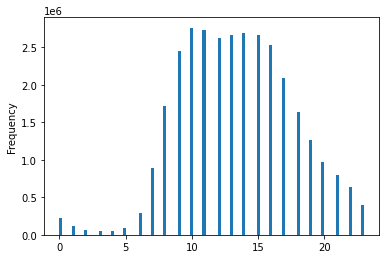

In [16]:
order_hr_hist = df_ords_prods_cx['order_hour_of_day'].plot.hist(bins = 100)

In [17]:
# frequency
df_ords_prods_cx['order_hour_of_day'].value_counts(dropna=False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

### _Observation: 9:00 - 17:00 has the highest number in orders in a day._

## __III. Scatterplot : Connection between age and spending power (income)__

In [18]:
df_age_income = small[['age','income']]

In [19]:
df_age_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6479579 entries, 9 to 32404841
Data columns (total 2 columns):
 #   Column  Dtype
---  ------  -----
 0   age     int64
 1   income  int64
dtypes: int64(2)
memory usage: 148.3 MB


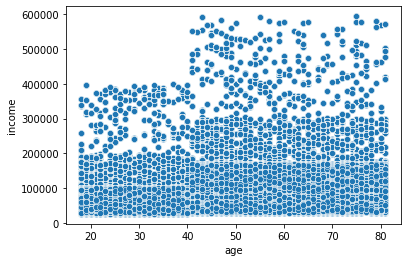

In [20]:
age_income_scat = sns.scatterplot(x = 'age', y = 'income',data = df_age_income)

### _Observation: The higher the age, the higher the income. The majority ages 50 years and over has the higher number in customers._

## __IV. Line Chart : Difference in expenditure (the “prices” column) depending on the hour of the day.__

In [21]:
df_order_price = small[['order_hour_of_day','prices']]

In [22]:
df_order_price.head()

,order_hour_of_day,prices
9,8,9.0
10,8,12.5
18,14,4.4
20,8,4.4
24,7,1.0


In [23]:
df_order_price.info

<bound method DataFrame.info of           order_hour_of_day  prices
9                         8     9.0
10                        8    12.5
18                       14     4.4
20                        8     4.4
24                        7     1.0
...                     ...     ...
32404824                 16    12.5
32404827                  7     3.5
32404833                 22    10.7
32404836                  1    10.7
32404841                 12    10.7

[6479579 rows x 2 columns]>

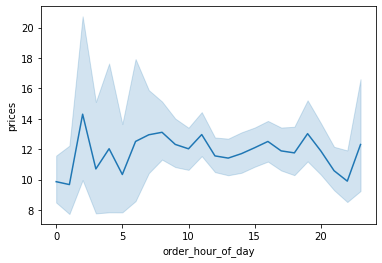

In [24]:
order_hr_price_ln = sns.lineplot(data = df_order_price, x = 'order_hour_of_day', y = 'prices')

### _Observation: Highest orders in a day are the orders that has the lowest prices._

### __V. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.__

In [25]:
print(df_ords_prods_cx.loc[:, 'number_dependants'])

0           3
1           3
2           3
3           3
4           3
           ..
32404854    0
32404855    3
32404856    3
32404857    3
32404858    3
Name: number_dependants, Length: 32404859, dtype: int64


In [26]:
df_dependent_age = small[['number_dependants','age']]

In [27]:
df_dependent_age.head()

,number_dependants,age
9,3,31
10,3,31
18,3,31
20,3,31
24,3,31


In [28]:
df_dependent_age.info

<bound method DataFrame.info of           number_dependants  age
9                         3   31
10                        3   31
18                        3   31
20                        3   31
24                        3   31
...                     ...  ...
32404824                  0   19
32404827                  1   38
32404833                  0   25
32404836                  0   25
32404841                  0   25

[6479579 rows x 2 columns]>

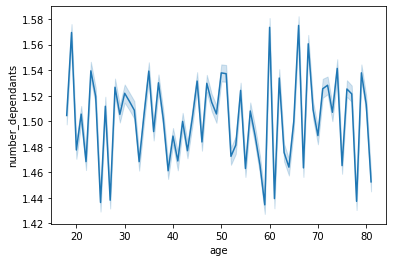

In [29]:
dependent_age_ln = sns.lineplot(data = df_dependent_age, x = 'age', y = 'number_dependants')

### _Observation: Almost equally distributed the dependents and ages._

## 04. Export

In [30]:
path = r'C:\Users\ThinkPad X250\Documents\Instacart Basket Analysis\04 Analysis\Visualizations'

In [31]:
loyal_bar.figure.savefig(os.path.join(path, 'loyal_bar.png'))

In [32]:
order_hr_hist.figure.savefig(os.path.join(path, 'order_hr_hist.png'))

In [33]:
age_income_scat.figure.savefig(os.path.join(path, 'age_income_scat.png'))

In [34]:
order_hr_price_ln.figure.savefig(os.path.join(path, 'order_hr_price_ln.png'))

In [35]:
dependent_age_ln.figure.savefig(os.path.join(path, 'dependent_age_ln.png'))